<font color='lightblue' size=6>Practice 1: Second part. Implementation and evaluation with value iteration rule</font>

<font color='red'> **Pablo Muñoz Alcaide**
</font>
---

Recall from theory slides the scenario with no determinism transitions.

In [ ]:
import numpy as np
state = [0,1,2,3,4]
action = [0,1,2] # left, staying, right movements
T = np.array([[[1/2,1/2,0,0,0],[1/2,1/2,0,0,0],[2/3,1/3,0,0,0]],
              [[1/3,2/3,0,0,0],[1/4,1/2,1/4,0,0],[0,2/3,1/3,0,0]],
              [[0,1/3,2/3,0,0],[0,1/4,1/2,1/4,0],[0,0,2/3,1/3,0]],
              [[0,0,1/3,2/3,0],[0,0,1/4,1/2,1/4],[0,0,0,2/3,1/3]],
              [[0,0,0,1/3,2/3],[0,0,0,1/2,1/2],[0,0,0,1/2,1/2]]])
num_states = 5
num_actions = 3
gamma = 1/2
R = np.zeros(5)
R[4] = 1

<font color='brown' size=6> *Exercise* </font>

Write a function implementing the value iteration algorithm. The function must return the V\* array containing the optimal value for each state. With the above proposed values, the result should be:

[0.00833333 0.025      0.1        0.4        1.6       ]

In [ ]:
def ValueIteration(T, num_states, num_actions, gamma, R):
  # set V = 0 for all the states
  V=np.zeros((num_states,))
  difference = 1
  #i is to calculate the number of iterations.
  i=0
  while difference > 10**(-9):
    difference=0
    for s in range(num_states):
      v = V[s]
      #we calculate the value state function for each state
      V[s] = max(np.sum(T[s,:]*(R[s]+gamma*V), axis=1))
      difference = max(difference, abs(v-V[s]))
    i+=1
    #set a limit of iterations. Although the algorithm converges we set this limit
    #to avoid a too large number of iterations.
    if i > 25:
      break
  return V









V = ValueIteration(T, num_states, num_actions, gamma, R)
print(V)

[0.00833333 0.025      0.1        0.4        1.6       ]


<font color='brown' size=6> *Exercise* </font>

Lets calculate now what is the optimum policy given this optimum values for the states.

First, write a function to calculate Q\*(s,a) from V\* for all state s and all action a. This function must return a (num_state, num_action) bidimensional array.

For this scenario. given V\* calculated with gamma = 0.5 the result should be:

[[0.00833333 0.00833333 0.00694444]

 [0.00972222 0.01979166 0.025     ]

 [0.0375     0.078125   0.1       ]

 [0.15       0.3125     0.4       ]

 [1.6        1.5        1.5       ]]


In [ ]:
def QValueFromV(T, num_states, num_actions, gamma, R, V):
  #Set Q an array of 0s and size (num_states,num_actions)
  Q=np.zeros((num_states,num_actions))
  difference=1
  while difference > 10**(-10):
    difference=0
    #we go through of each state and each action.
    for s in range(num_states):
      for a in range(num_actions):
        q = Q[s,a]
        #Q[s,a] = np.sum(T[s,a,:]*(R[s]+gamma*np.max(Q,axis=1))) alternative way to calculate.
        Q[s,a] = np.sum(T[s,a,:]*(R[s]+gamma*V))
        difference = max(difference, abs(q-Q[s,a]))
  return Q

#Q[s,a] = np.sum(T[s,a,:]*(R[s]+gamma*np.max(Q,axis=1))) alternative way to calculate.
#I think this expression is more accurate because the iterates of this expression converge to Q*.
# However we use V which would be the same if our V would be V*, but our V is an
#approximation of V^* so we are carrying forward small errors.


Q = QValueFromV(T, num_states, num_actions, gamma, R, V)
print(Q)


[[0.00833333 0.00833333 0.00694444]
 [0.00972222 0.01979167 0.025     ]
 [0.0375     0.078125   0.1       ]
 [0.15       0.3125     0.4       ]
 [1.6        1.5        1.5       ]]


<font color='brown' size=6> *Exercise* </font>

Now, calculate the optimum policy from Q*(s,a). Write a function for doing that. For the already proposed values the result should be:

[0. 2. 2. 2. 0.]

In [ ]:
def OptimalPolicy(num_states,Q):
  return np.argmax(Q,axis=1)






print(OptimalPolicy(num_states, Q))

[0 2 2 2 0]


<font color='brown' size=6> *Exercise* </font>

Let's do a graphical study about how the value of V\* changes as gamma changes too. First, import mapplotlib as you already did in the first part of this practice.
Remember to import matplotlib and put the size of the image as 7,4.

In [ ]:
import matplotlib.pyplot as plt


Then, calculate and store V\* for the gamma values:

gamma = (0.1, 0.25, 0.5, 0,75, 0.9, 1)

Next, write matplotlib python code to show **this** plot (each line corresponds with the values of each state, from state 0 to state 4, in each of the gamma values proposed):

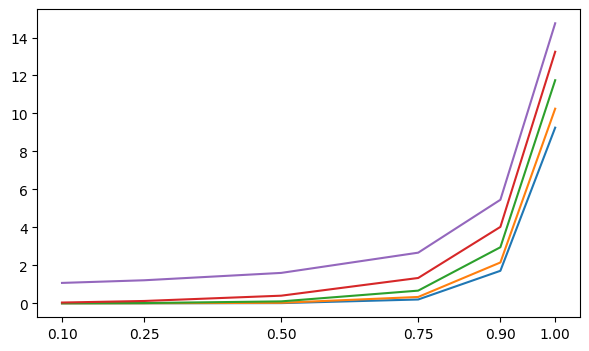




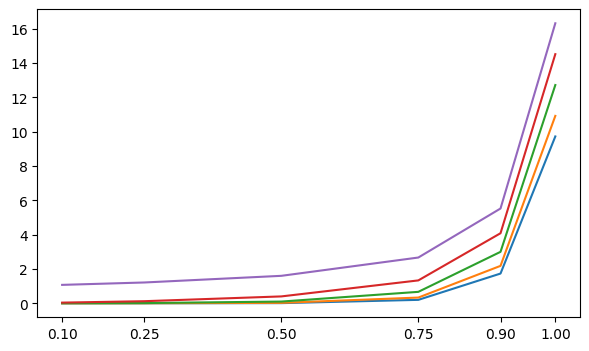

In [ ]:
gamma = np.array([0.1, 0.25, 0.5, 0.75, 0.9,1])
#create a array of the Value-state function for each gamma.
V_f=np.zeros((len(gamma),num_states))
i=0
for g in gamma:
  V_f[i,:]=ValueIteration(T, num_states, num_actions, g, R)
  i+=1

#we plot each State-Value through each gamma.
fig, ax = plt.subplots(figsize=[7,4])
ax.plot(gamma,V_f)
plt.xticks([0.1, 0.25, 0.5, 0.75, 0.9,1])
plt.show()










Explain in the next text cell what do you observe from this plot for this scenario

Firstly we have to remark that the plot it isn't exactly the same as the previous image. This is because the value-state iteration for gamma = 1 doesn't converge, so we had to set an arbitrary limit of iterations. In our case, this limit is set to 25 to preserve the previous results. But if we change this to 23 we will have the same graphic.

On the other hand, in the graphic we can observe the evolution of the Value-State function at each state through the different gamma values. Remember that the value-state function estimates the expected cumulative reward an agent can obtain starting from a particular state s and following a specific policy π.

In theory, high values of γ imply that the agent is putting greater emphasis on long-term rewards. Otherwise, if γ is close to 0, the agent would be more greedy and would consider immediate rewards ignoring the long-term rewards.

For that reason, in the graphic the value-state function grows for every state when γ grows. Because of putting emphasis in long-term rewards lead to a preference for actions and states that result in higher cumulative rewards over time.

However, we observed that when γ is 1 the V function doesn't converge and we had to put a maximum number of iterations. Also, when is close to 1, the number of iterations could be so high to reach a significant approximation causing an increase of the computational cost or time. Consequently, in practice we have to find a balance between increasing the value of gamma and not increasing so much the time of computation.

